In [10]:
import numpy as np
import glob
def read_latency(alg):
    trace_latency_files = glob.glob(alg+'*'+'trace')
    for f in trace_latency_files:
        print(f)
        i = 0
        with open(f, 'r') as fin:
            line = fin.readline()
            if i == 0:
                trace_latency_list = np.array(line.split(), dtype=np.float32) * 1/len(trace_latency_files)
            else:
                trace_latency_list += np.array(line.split(), dtype=np.float32) * 1/len(trace_latency_files)
            i += 1
    e2e_latency_files = glob.glob(alg+'*'+'e2e')
    for f in e2e_latency_files:
        print(f)
        i = 0
        with open(f, 'r') as fin:
            line = fin.readline()
            if i == 0:
                e2e_latency_list = np.array(line.split(), dtype=np.float32) * 1/len(e2e_latency_files)
            else:
                e2e_latency_list += np.array(line.split(), dtype=np.float32) * 1/len(e2e_latency_files)
            i += 1
    return trace_latency_list, e2e_latency_list

In [3]:
import matplotlib.pyplot as plt
FONT_SIZE = 24
plt.rc('font', size=FONT_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=FONT_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=FONT_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=FONT_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=FONT_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=FONT_SIZE)    # legend fontsize
plt.rc('figure', titlesize=FONT_SIZE)  # fontsize of the figure title
plt.rc('lines', linewidth=3)
plt.rc('lines', markersize=12)  # size of marker

In [ ]:
t1, e1 = read_latency('/nfs/16_1024/EC') #EC-ine
t2, e2 = read_latency('/nfs/16_1024/eEC') #EC
t3, e3 = read_latency('/nfs/16_1024/LRU') #LRU
len1 = len(t1)
len2 = len(t2)
len_min = min(len1, len2)
#t1 = t1[:len_min]
#t2 = t2[:len_min]

In [81]:
names = ['EC_t', 'EC_e', 'eEC_t', 'eEC_e', 'LRU_t', 'LRU_e']
data = [t1, e1, t2, e2, t3, e3]
for i in range(len(names)):
    with open(f'/nfs/runner/{names[i]}.avg', 'wb') as f:
        np.save(f, data[i])

In [82]:
names = ['EC_t', 'EC_e', 'eEC_t', 'eEC_e', 'LRU_t', 'LRU_e']
with open(f'/nfs/runner/EC_t.avg', 'rb') as f:
    t1 = np.load(f)
with open(f'/nfs/runner/EC_e.avg', 'rb') as f:
    e1 = np.load(f)
with open(f'/nfs/runner/eEC_t.avg', 'rb') as f:
    t2 = np.load(f)
with open(f'/nfs/runner/eEC_e.avg', 'rb') as f:
    e2 = np.load(f)
with open(f'/nfs/runner/LRU_t.avg', 'rb') as f:
    t3 = np.load(f)
with open(f'/nfs/runner/LRU_e.avg', 'rb') as f:
    e3 = np.load(f)

In [83]:
n_warmup = 0
t_ine = t1[n_warmup:]
t_mat = t2[n_warmup:]
t_lru = t3[n_warmup:]
e_ine = e1[n_warmup:]
e_mat = e2[n_warmup:]
e_lru = e3[n_warmup:]
print('avg replay latency (MAT inelastic - LRU) ', np.mean(t_ine-t_lru), ' us')
print('avg replay latency (MAT - LRU)           ', np.mean(t_mat-t_lru), ' us')
print('avg cache latency (MAT inelastic - LRU)  ', np.mean(e_ine-e_lru), ' us')
print('avg cache latency (MAT - LRU)            ',np.mean(e_mat-e_lru), ' us')
print(len(t_ine))

avg replay latency (MAT inelastic - LRU)  364.5253  us
avg replay latency (MAT - LRU)            -4.8296747  us
avg cache latency (MAT inelastic - LRU)   7.2448993  us
avg cache latency (MAT - LRU)             2.232315  us
199000000


In [84]:
t_mat_sort = np.sort(t_mat)
t_ine_sort = np.sort(t_ine)
t_lru_sort = np.sort(t_lru)
print('done')

done


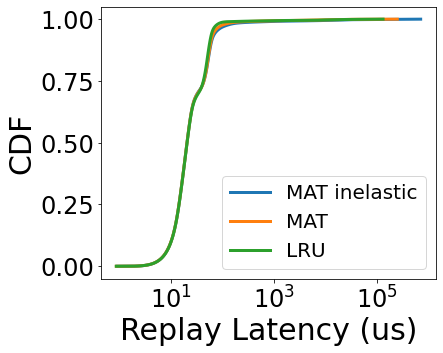

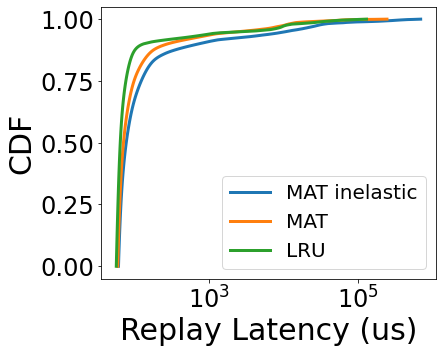

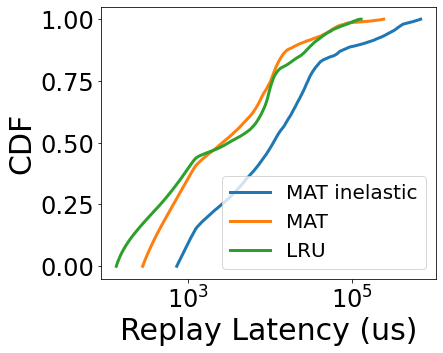

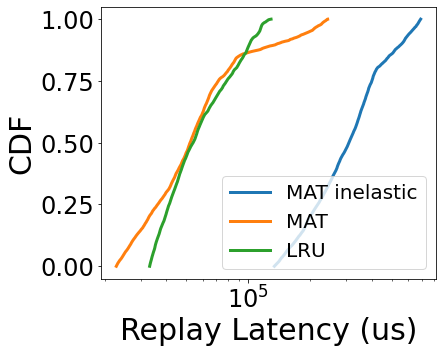

In [86]:
import matplotlib.pyplot as plt

for n_tail in (0, 19900000, 1990000, 199000):
    plt.figure(figsize=(6,5))
    x = t_ine_sort[-n_tail:]
    y = np.arange(len(x))/float(len(x))
    plt.plot(x, y, label='MAT inelastic')
    x = t_mat_sort[-n_tail:]
    y = np.arange(len(x))/float(len(x))
    plt.plot(x, y, label='MAT')
    x = t_lru_sort[-n_tail:]
    y = np.arange(len(x))/float(len(x))
    plt.plot(x, y, label='LRU')

    #plt.ylim(top=0.99999)
    #plt.ylim(bottom=0.1)
    plt.xscale('log')
    plt.xlabel('Replay Latency (us)', fontsize=30)
    plt.ylabel('CDF', fontsize=30)
    plt.legend(ncol=1, prop={'size': 20}, loc='lower right')

    plt.show()

In [46]:
e_mat_sort = np.sort(e_mat)
e_ine_sort = np.sort(e_ine)
e_lru_sort = np.sort(e_lru)
print('done')

done


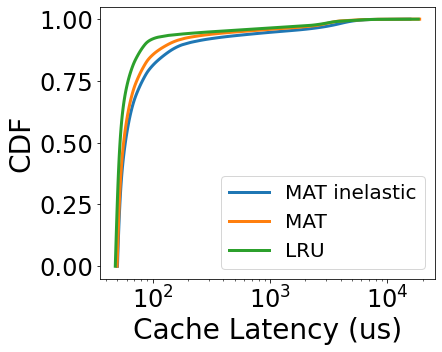

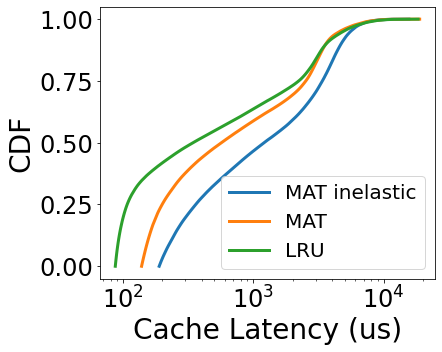

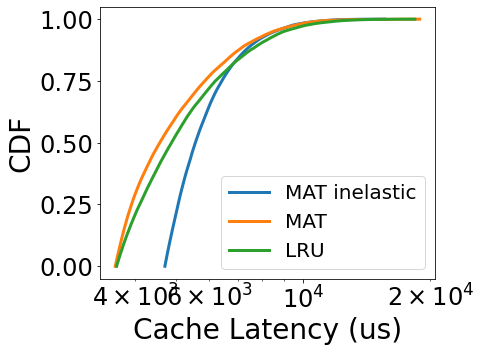

In [47]:
for n_tail in [14900000, 1490000, 149000]:
    plt.figure(figsize=(6,5))
    x = e_ine_sort[-n_tail:]
    y = np.arange(len(x))/float(len(x))
    plt.plot(x, y, label='MAT inelastic')
    x = e_mat_sort[-n_tail:]
    y = np.arange(len(x))/float(len(x))
    plt.plot(x, y, label='MAT')
    x = e_lru_sort[-n_tail:]
    y = np.arange(len(x))/float(len(x))
    plt.plot(x, y, label='LRU')

    plt.xscale('log')
    plt.xlabel('Cache Latency (us)', fontsize=28)
    plt.ylabel('CDF', fontsize=28)
    plt.legend(ncol=1, prop={'size': 20}, loc='lower right')

    plt.show()

In [26]:
import numpy as np
def read_miss(f):
    miss_list = []
    with open(f, 'r') as fin:
        lines = fin.readlines()
        for line in lines:
            if line.startswith('miss ratio:'):
                miss_list.append(line.split()[-1])
    return np.array(miss_list, dtype=np.float32)

In [29]:
ec_miss = read_miss('/nfs/runner/eEC/0.log')
print(len(ec_miss))
eci_miss = read_miss('/nfs/runner/EC/0.log')[:1990]
print(len(eci_miss))
lru_miss = read_miss('/nfs/runner/LRU/0.log')
print(len(lru_miss))

1990
1990
1990


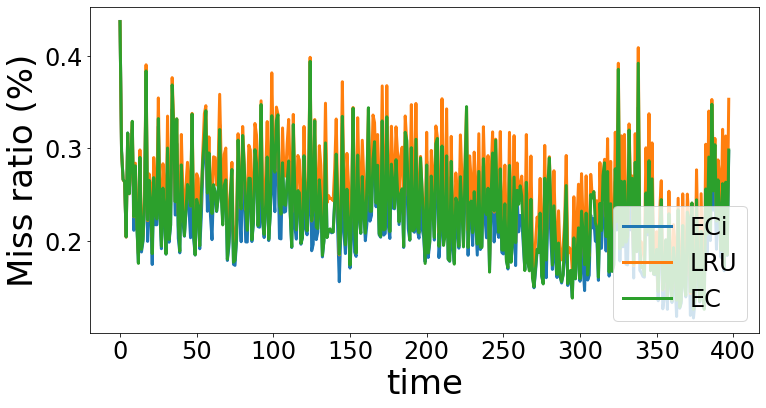

In [32]:
plt.figure(figsize=(12,6))
n = 5
a1 = np.average(lru_miss.reshape(-1, n), axis=1)
a2 = np.average(eci_miss.reshape(-1, n), axis=1)
plt.plot(range(len(a2)), a2, label='ECi')
plt.plot(range(len(a1)), a1, label='LRU')

a_ec = np.average(ec_miss.reshape(-1, n), axis=1)
plt.plot(range(len(a_ec)), a_ec, label='EC')


plt.xlabel('time', fontsize=34)
plt.ylabel('Miss ratio (%)', fontsize=34)
plt.legend(ncol=1, prop={'size': 24}, loc='lower right')

In [34]:
import numpy as np
def read_tt(f):
    miss_list = []
    with open(f, 'r') as fin:
        lines = fin.readlines()
        for line in lines:
            if line.startswith('target throughput:'):
                miss_list.append(line.split()[-1])
    return np.array(miss_list, dtype=np.float32)
ec_tt = read_tt('/nfs/runner/eEC/0.log')
print(len(ec_tt))
eci_tt = read_tt('/nfs/runner/EC/0.log')[:1990]
print(len(eci_tt))
lru_tt = read_tt('/nfs/runner/LRU/0.log')
print(len(lru_tt))

1990
1990
1990


[65 35 27 41 53 46 34 49 60 43 21 32 51 44 72 42 36 40 37 38] [30596.291 30698.828 30756.469 30806.4   30825.77  30957.11  30999.8
 31342.582 31348.1   31368.168 31859.646 31889.791 32268.182 32455.709
 33000.94  33443.32  35147.18  35871.35  36547.96  38897.73 ]


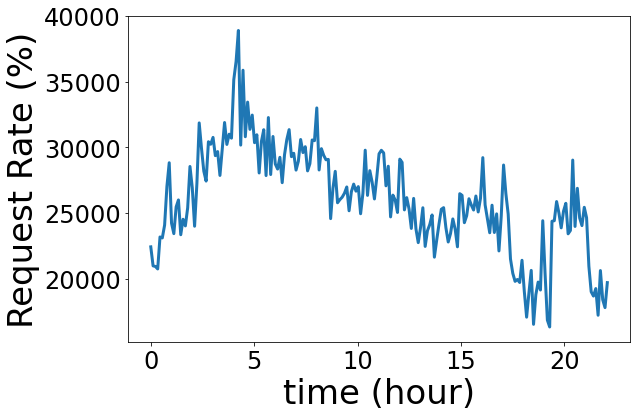

In [79]:
plt.figure(figsize=(9,6))
n = 10
#a_lru = np.average(lru_tt.reshape(-1, n), axis=1)
#a_eci = np.average(eci_tt.reshape(-1, n), axis=1)
a_ec = np.average(ec_tt.reshape(-1, n), axis=1)
a_lru = lru_tt
a_eci = eci_tt
#a_ec = ec_tt

begin_t = 1533121514
end_t = 1533201411
scale = (end_t - begin_t) / 3600/ len(a_ec) 
plt.plot(np.array(range(len(a_ec))) * scale , a_ec, label='EC')

plt.xlabel('time (hour)', fontsize=34)
plt.ylabel('Request Rate (%)', fontsize=34)
#plt.legend(ncol=1, prop={'size': 24}, loc='lower right')

indices = np.argsort(a_ec)[-20:]
print(indices, a_ec[indices])

In [76]:
e2e_latencys = [e1, e2, e3]
e2e_peak = [[], [], []]
for i in range(3):
    #for j in range(len(indices)):
    #    print(indices[j] * 100000 - 300000, indices[j] * 100000 + 200000)
    #    e2e_peak[i].extend(e2e_latencys[i][indices[j] * 100000 - 100000: indices[j] * 100000 + 0])
    e2e_peak[i].extend(e2e_latencys[i][37 * 1000000 - 4000000: 37 * 1000000 + 4000000])
    e2e_peak[i] = np.array(e2e_peak[i])
    e2e_peak[i] = np.sort(e2e_peak[i])
print('done')
print(len(e2e_peak[0]))

done
8000000


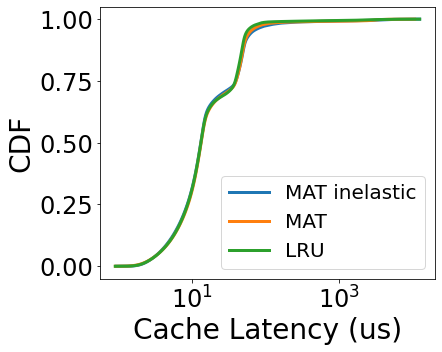

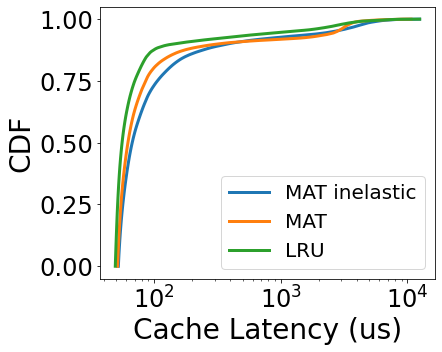

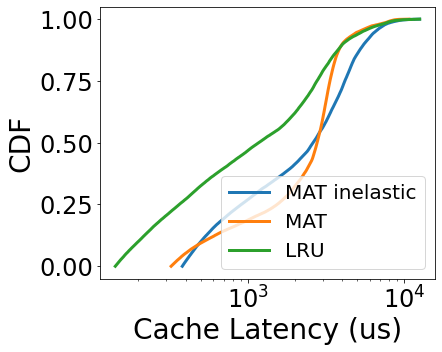

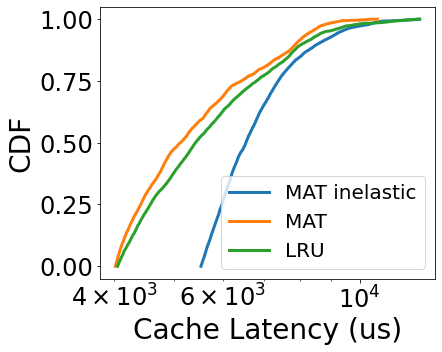

In [80]:
for n_tail in [0, 800000, 80000, 8000]:
    plt.figure(figsize=(6,5))
    x = e2e_peak[0][-n_tail:]
    y = np.arange(len(x))/float(len(x))
    plt.plot(x, y, label='MAT inelastic')
    x = e2e_peak[1][-n_tail:]
    y = np.arange(len(x))/float(len(x))
    plt.plot(x, y, label='MAT')
    x = e2e_peak[2][-n_tail:]
    y = np.arange(len(x))/float(len(x))
    plt.plot(x, y, label='LRU')

    plt.xscale('log')
    plt.xlabel('Cache Latency (us)', fontsize=28)
    plt.ylabel('CDF', fontsize=28)
    plt.legend(ncol=1, prop={'size': 20}, loc='lower right')

    #plt.ylim(top=0.99999)
    #plt.ylim(bottom=bottom)
    plt.show()

In [87]:
t_latencys = [t1, t2, t3]
t_peak = [[], [], []]
for i in range(3):
    #for j in range(len(indices)):
    #    print(indices[j] * 100000 - 300000, indices[j] * 100000 + 200000)
    #    e2e_peak[i].extend(e2e_latencys[i][indices[j] * 100000 - 100000: indices[j] * 100000 + 0])
    t_peak[i].extend(t_latencys[i][37 * 1000000 - 4000000: 37 * 1000000 + 4000000])
    t_peak[i] = np.array(t_peak[i])
    t_peak[i] = np.sort(t_peak[i])
print('done')
print(len(t_peak[0]))

done
8000000


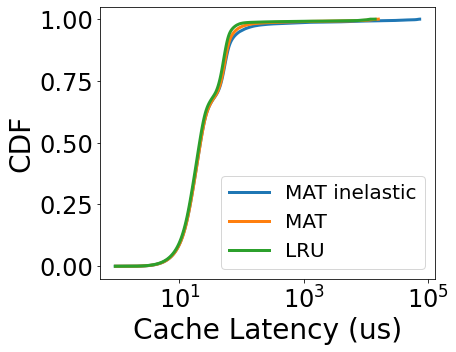

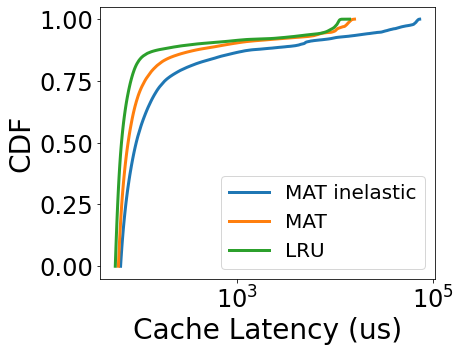

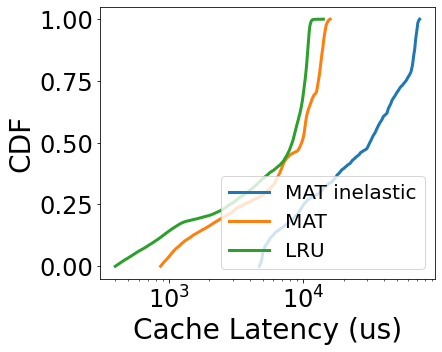

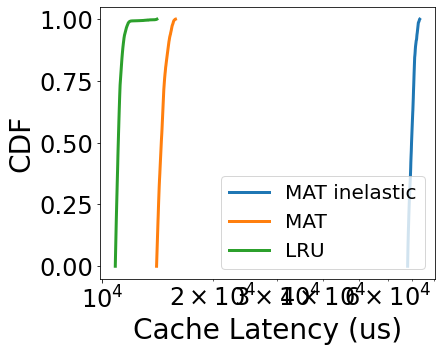

In [88]:
for n_tail in [0, 800000, 80000, 8000]:
    plt.figure(figsize=(6,5))
    x = t_peak[0][-n_tail:]
    y = np.arange(len(x))/float(len(x))
    plt.plot(x, y, label='MAT inelastic')
    x = t_peak[1][-n_tail:]
    y = np.arange(len(x))/float(len(x))
    plt.plot(x, y, label='MAT')
    x = t_peak[2][-n_tail:]
    y = np.arange(len(x))/float(len(x))
    plt.plot(x, y, label='LRU')

    plt.xscale('log')
    plt.xlabel('Cache Latency (us)', fontsize=28)
    plt.ylabel('CDF', fontsize=28)
    plt.legend(ncol=1, prop={'size': 20}, loc='lower right')

    #plt.ylim(top=0.99999)
    #plt.ylim(bottom=bottom)
    plt.show()

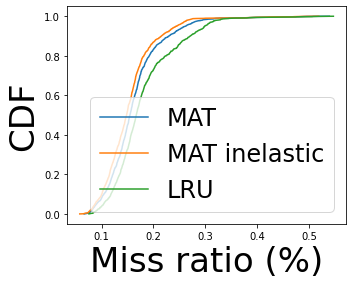

In [23]:
ec_miss_sort = np.sort(ec_miss[500:1900])
eci_miss_sort = np.sort(eci_miss[500:1900])
lru_miss_sort = np.sort(lru_miss[500:1900])
plt.figure(figsize=(5,4))
x = ec_miss_sort
y = np.arange(len(x))/float(len(x))
plt.plot(x, y, label='MAT')
x = eci_miss_sort
y = np.arange(len(x))/float(len(x))
plt.plot(x, y, label='MAT inelastic')
x = lru_miss_sort
y = np.arange(len(x))/float(len(x))
plt.plot(x, y, label='LRU')

plt.xlabel('Miss ratio (%)', fontsize=34)
plt.ylabel('CDF', fontsize=34)
plt.legend(ncol=1, prop={'size': 24}, loc='lower right')

plt.show()

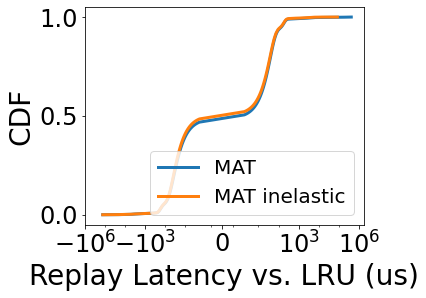

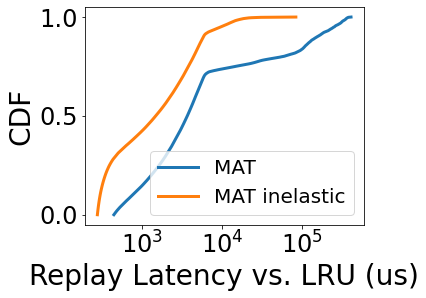

In [97]:
import matplotlib.pyplot as plt

for n_tail in (0, 1000000):
    plt.figure(figsize=(5,4))
    diff_t = t_mat-t_lru
    x = np.sort(diff_t)[-n_tail:]
    y = np.arange(len(x))/float(len(x))
    plt.plot(x, y, label='MAT')
    plt.xscale('symlog')

    diff_t = t_ine-t_lru
    x = np.sort(diff_t)[-n_tail:]
    y = np.arange(len(x))/float(len(x))
    plt.plot(x, y, label='MAT inelastic')
    plt.xscale('symlog')
    if n_tail == 0:
        plt.xticks([-1000000, -1000, 0, 1000, 1000000], rotation=0)
    plt.xlabel('Replay Latency vs. LRU (us)', fontsize=28)
    plt.ylabel('CDF', fontsize=28)
    plt.legend(ncol=1, prop={'size': 20}, loc='lower right')

    plt.show()

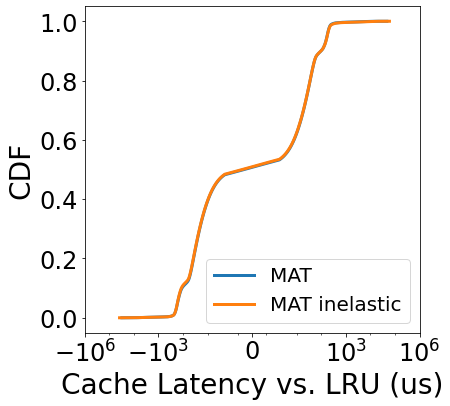

In [90]:
for n_tail in (0, 1000000):
    plt.figure(figsize=(5,4))
    diff_t = e_mat-e_lru
    x = np.sort(diff_t)[-n_tail:]
    y = np.arange(len(x))/float(len(x))
    plt.plot(x, y, label='MAT')
    plt.xscale('symlog')

    diff_t = e_ine-e_lru
    x = np.sort(diff_t)[-n_tail:]
    y = np.arange(len(x))/float(len(x))
    plt.plot(x, y, label='MAT inelastic')
    plt.xscale('symlog')
    if n_tail == 0:
        plt.xticks([-1000000, -1000, 0, 1000, 1000000], rotation=0)
    plt.xlabel('Cache Latency vs. LRU (us)', fontsize=28)
    plt.ylabel('CDF', fontsize=28)
    plt.legend(ncol=1, prop={'size': 20}, loc='lower right')

    plt.show()